# Dataset Description

Dataset has nearly 54000 instances. It has 10 features.

Features -

1. price : price in US dollars (\$326--\$18,823)
2. carat : weight of the diamond (0.2--5.01)
3. cut   : quality of the cut (Fair, Good, Very Good, Premium, Ideal)
4. color : diamond colour, from J (worst) to D (best)
5. clarity : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
6. x : length in mm (0--10.74)
7. y : width in mm (0--58.9)
8. z : depth in mm (0--31.8)
9. depth : total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
10. table : width of top of diamond relative to widest point (43--95)

**column "price" is the values to be predicted**

# Importing Libraries and Packages

In [2]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import  Normalizer , scale
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV , KFold , cross_val_score
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
%matplotlib inline

In [23]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
from sklearn.preprocessing import StandardScaler

In [25]:
from sklearn import metrics

In [3]:
data = pd.read_csv(r'C:\Users\Manoj\Downloads\diamonds.csv')

In [4]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
data.shape

(53940, 10)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


There are no missing values

In [7]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Minimum values of x, y and z are 0

Removing data with x,y,z having 0 value

In [8]:
data = data[(data[['x','y','z']] != 0).all(axis=1)]

Checking for Duplicate Values

In [9]:
data.duplicated().sum()

145

There are 145 duplicate entries. So, we need to drop them

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data.duplicated().sum()

0

Separating Numerical and Categorical columns

In [12]:
# Numerical Columns

numerical_data = data.select_dtypes(['int64','float64'])

numerical_cols = numerical_data.columns

print('Numerical Columns : {}'.format(list(numerical_cols)))

Numerical Columns : ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']


In [4]:
# Categorical Columns

categorical_data = data.select_dtypes(['object'])

categorical_cols = categorical_data.columns

print('Categorical Columns : {}'.format(list(categorical_cols)))

Categorical Columns : ['cut', 'color', 'clarity']


# Exploratory Data Analysis

C:\Users\manoj\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


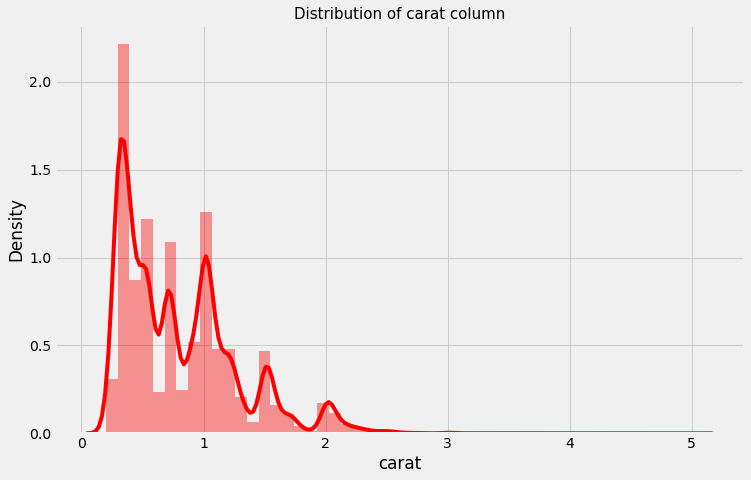

C:\Users\manoj\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


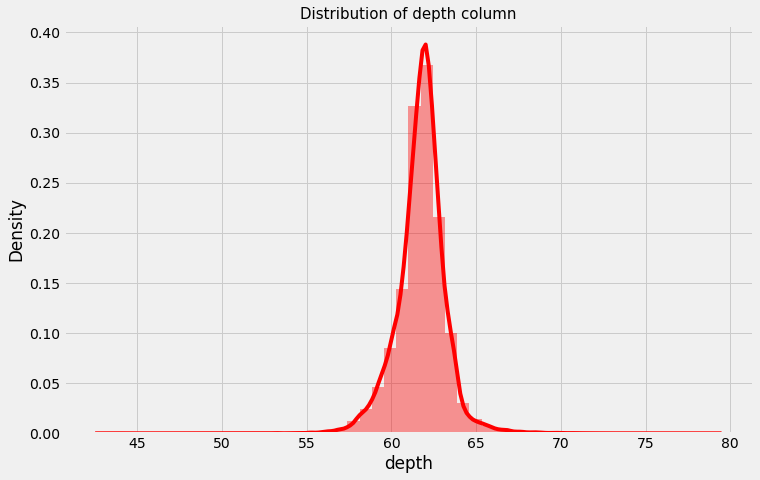

C:\Users\manoj\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


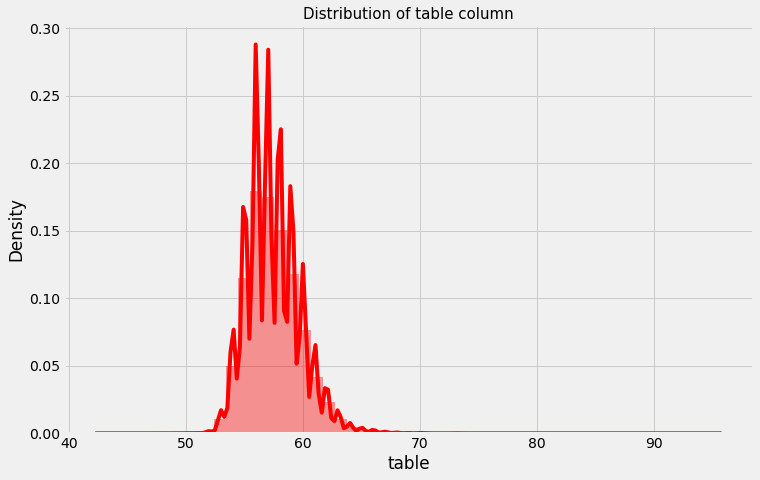

C:\Users\manoj\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


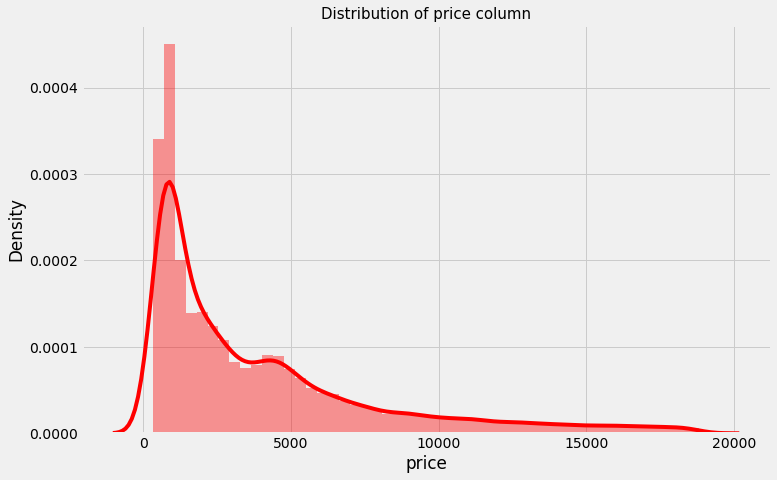

C:\Users\manoj\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


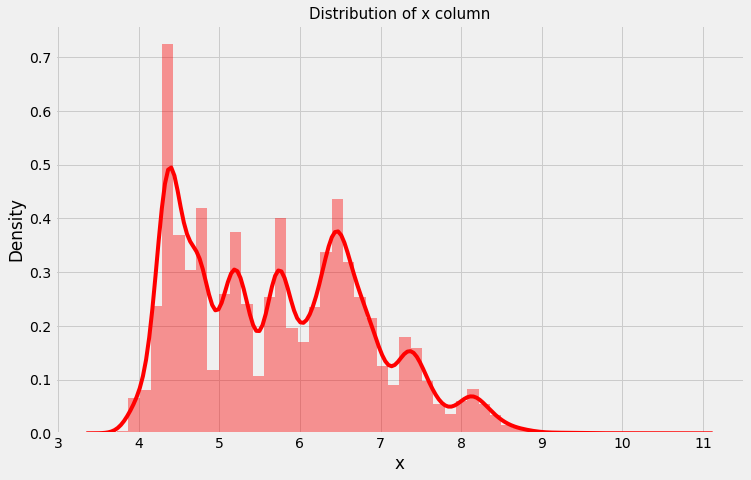

C:\Users\manoj\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


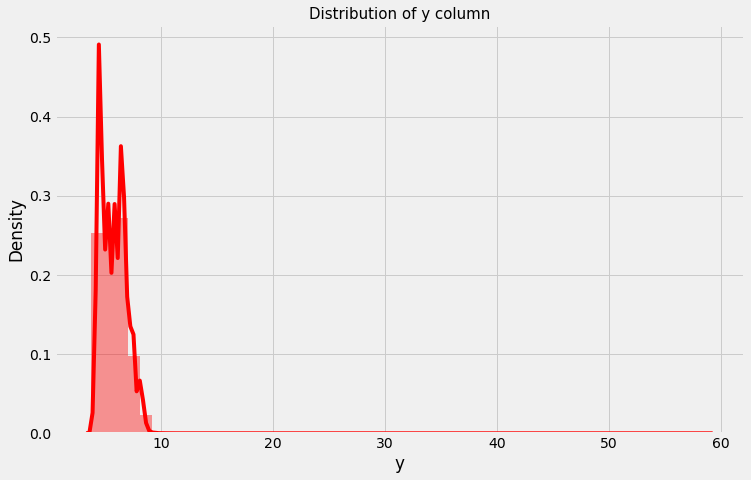

C:\Users\manoj\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


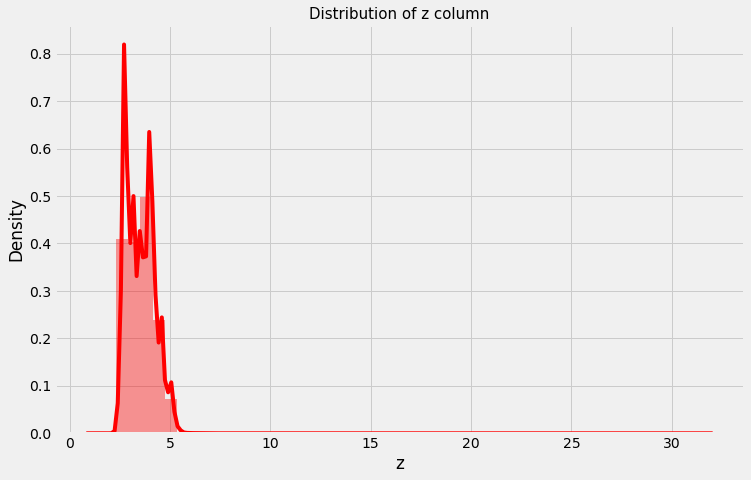

In [15]:
# Plotting the Histograms for the Numerical Columns
plt.style.use("fivethirtyeight")
for col in numerical_cols:
    plt.figure(figsize=(11,7))
    sns.distplot(data[col],color='red')
    plt.title(f"Distribution of {col} column",fontsize=15)
    plt.show()

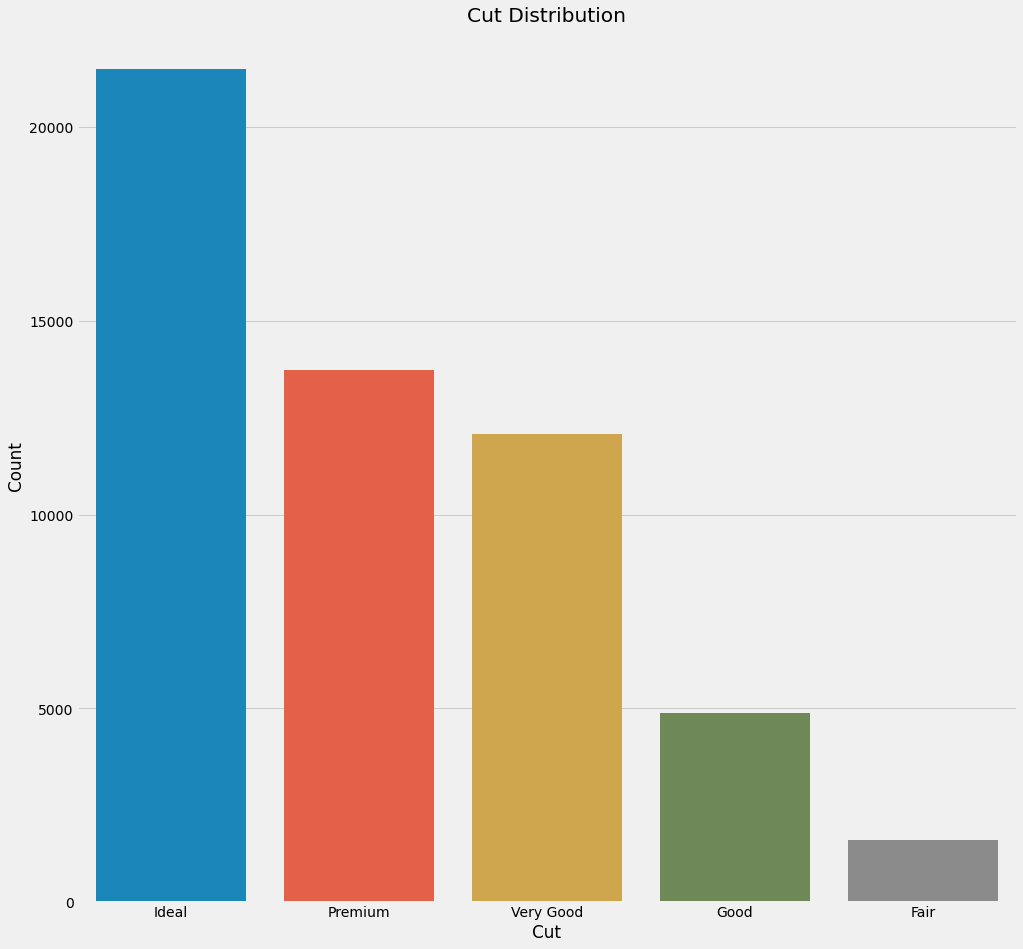

In [20]:
# Understanding 'cut' column

plt.figure(figsize = (15,15))

x = list(data['cut'].value_counts().index)

y = list(data['cut'].value_counts())

plt.title('Cut Distribution')

plt.xlabel('Cut')

plt.ylabel('Count')

sns.barplot(x=x,y=y)

plt.xticks(rotation=0)

plt.show()

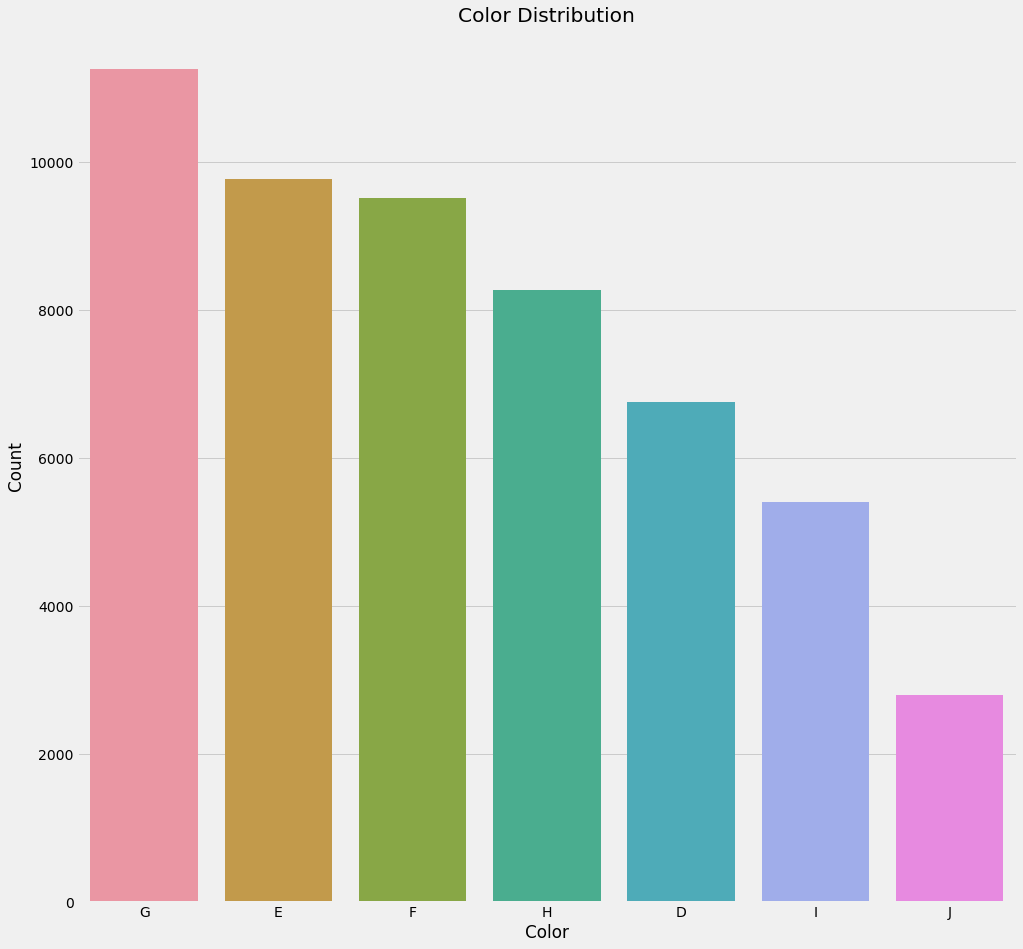

In [19]:
# Understanding 'color' column

plt.figure(figsize = (15,15))

x = list(data['color'].value_counts().index)

y = list(data['color'].value_counts())

plt.title('Color Distribution')

plt.xlabel('Color')

plt.ylabel('Count')

sns.barplot(x=x,y=y)

plt.xticks(rotation=0)

plt.show()

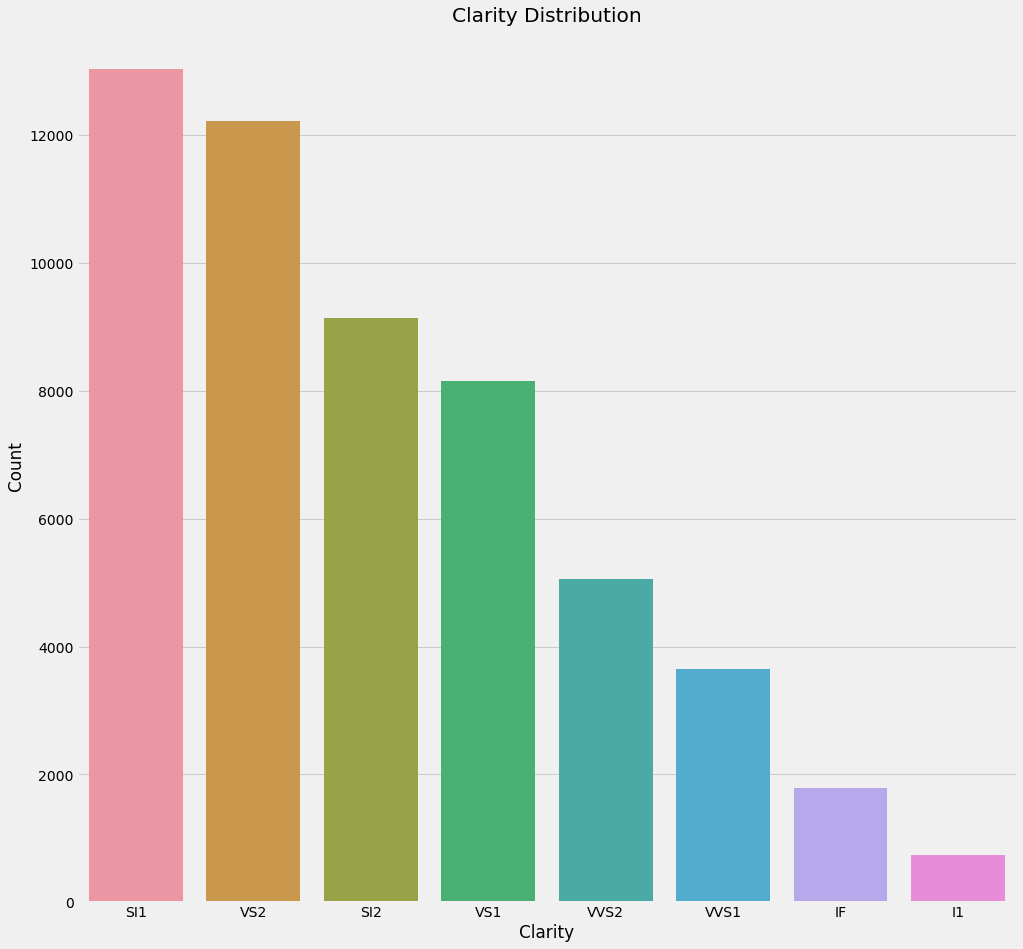

In [21]:
# Understanding 'clarity' column

plt.figure(figsize = (15,15))

x = list(data['clarity'].value_counts().index)

y = list(data['clarity'].value_counts())

plt.title('Clarity Distribution')

plt.xlabel('Clarity')

plt.ylabel('Count')

sns.barplot(x=x,y=y)

plt.xticks(rotation=0)

plt.show()

C:\Users\manoj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\manoj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\manoj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


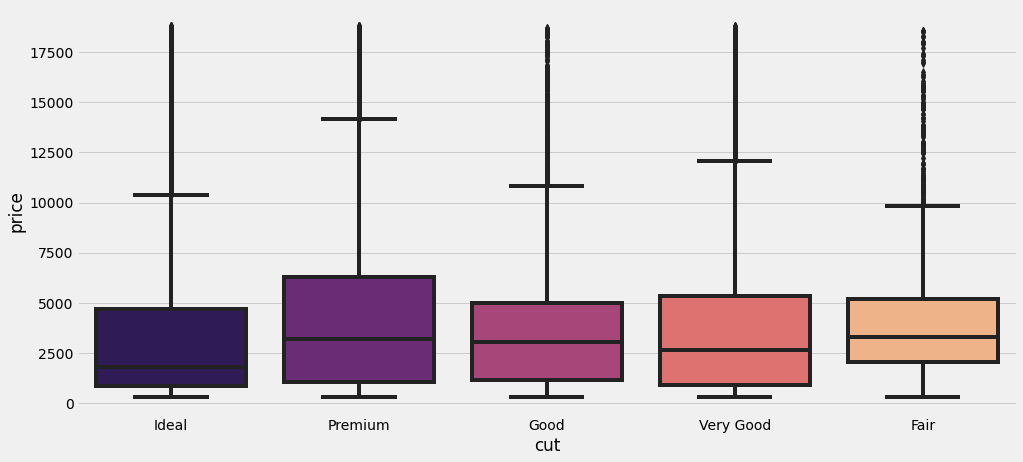

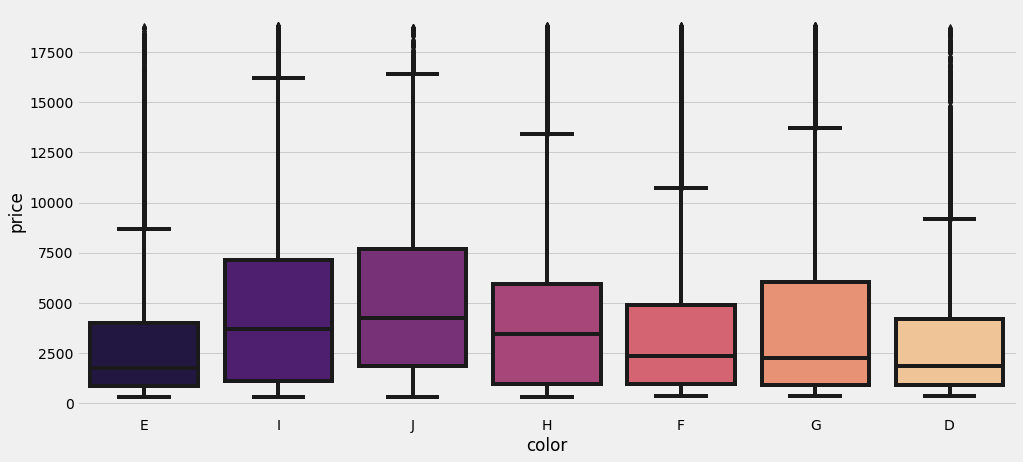

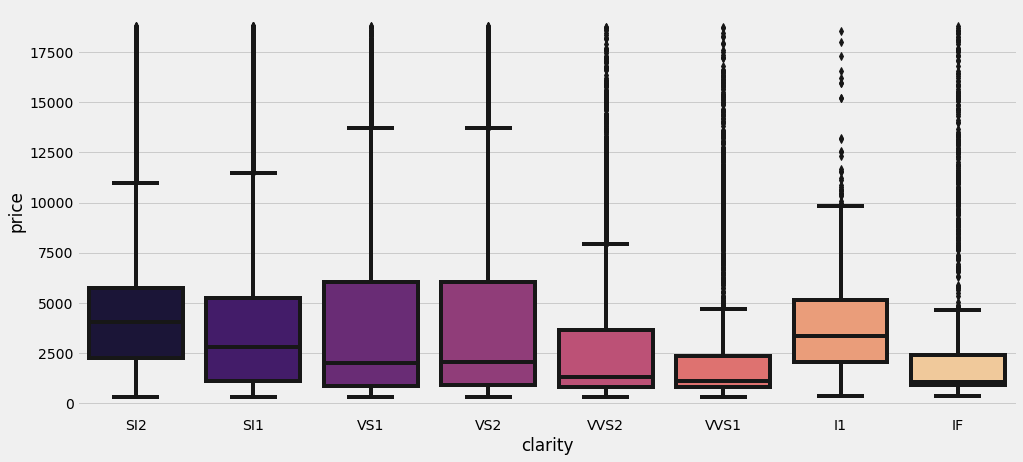

In [22]:
# Plotting the Price Distribution wrt to Categorical Columns
for col in categorical_cols:
    plt.figure(figsize=(15,7))
    sns.boxplot(data[col],data['price'],palette='magma')
    

<AxesSubplot:title={'center':'Heatmap of Person Correlation matrix '}>

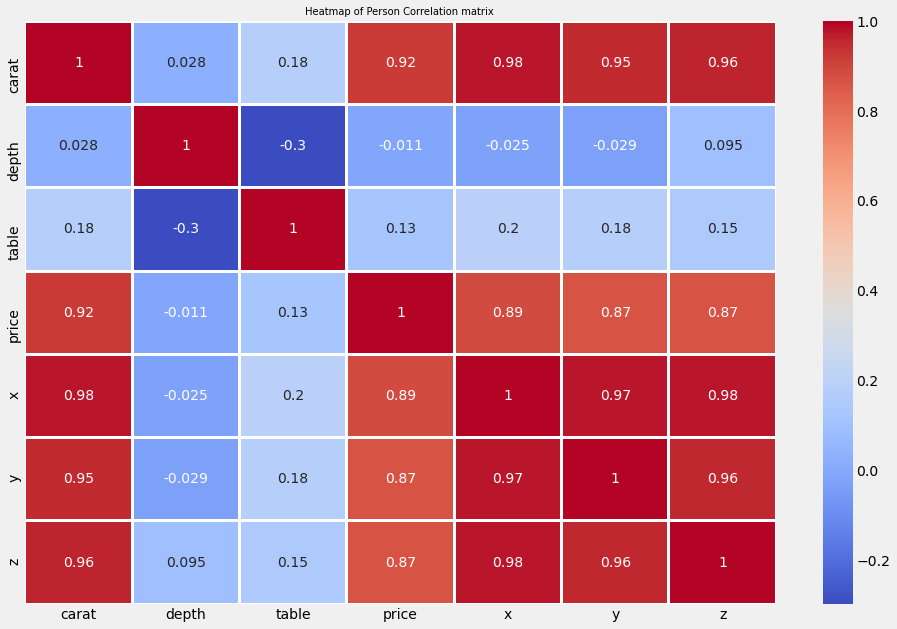

In [24]:
plt.figure(figsize=(15,10))
plt.title("Heatmap of Person Correlation matrix ",fontsize=10)
sns.heatmap(data.corr(method = 'pearson'), annot = True, cmap ='coolwarm', linewidths=2)

<AxesSubplot:xlabel='carat', ylabel='price'>

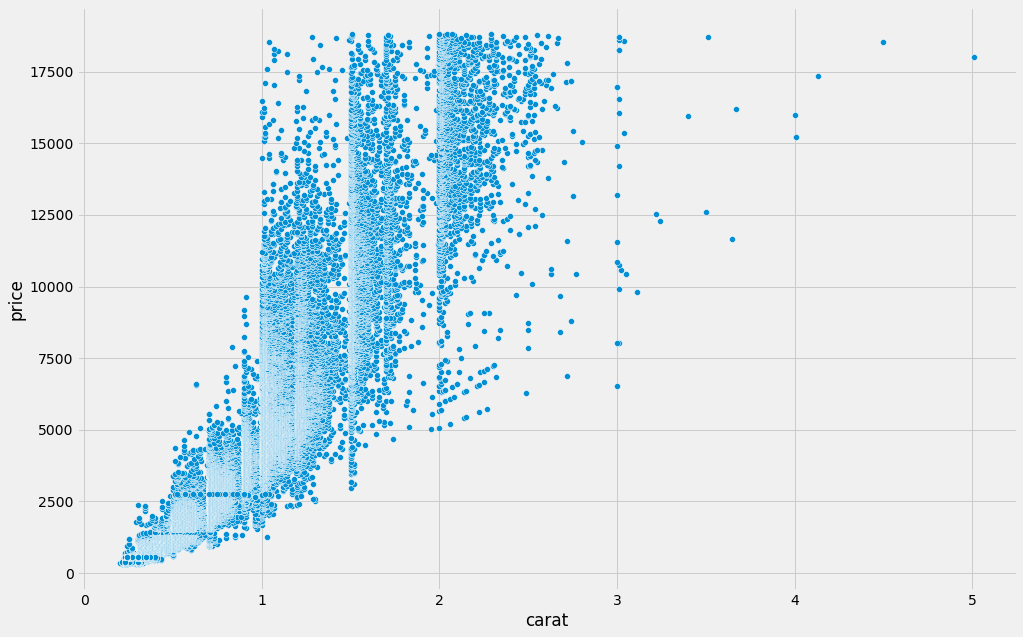

In [27]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='carat', y='price', data=data)

<AxesSubplot:xlabel='depth', ylabel='price'>

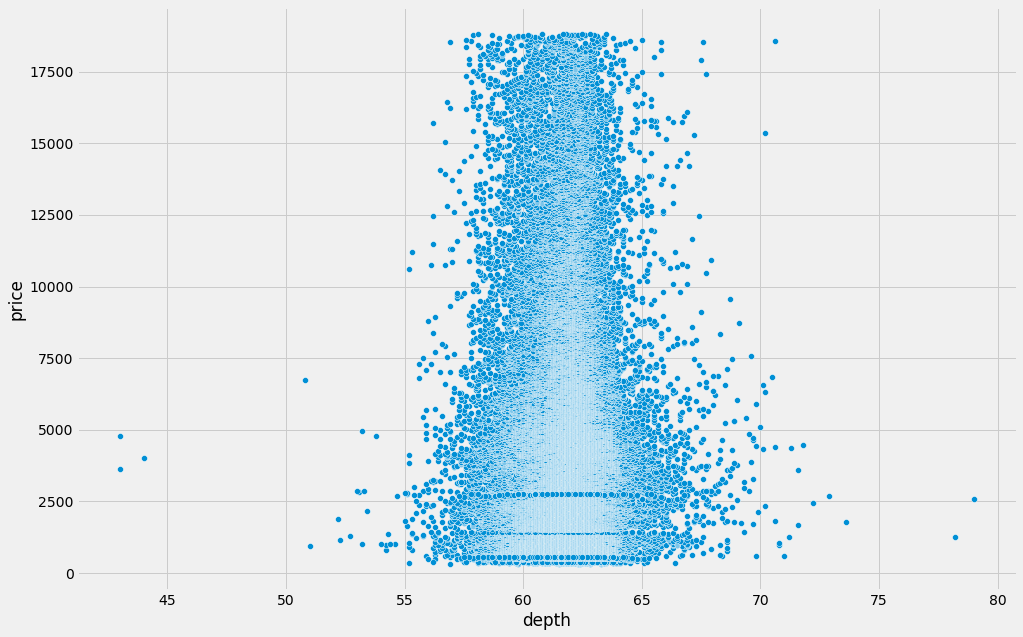

In [28]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='depth', y='price', data=data)

<AxesSubplot:xlabel='table', ylabel='price'>

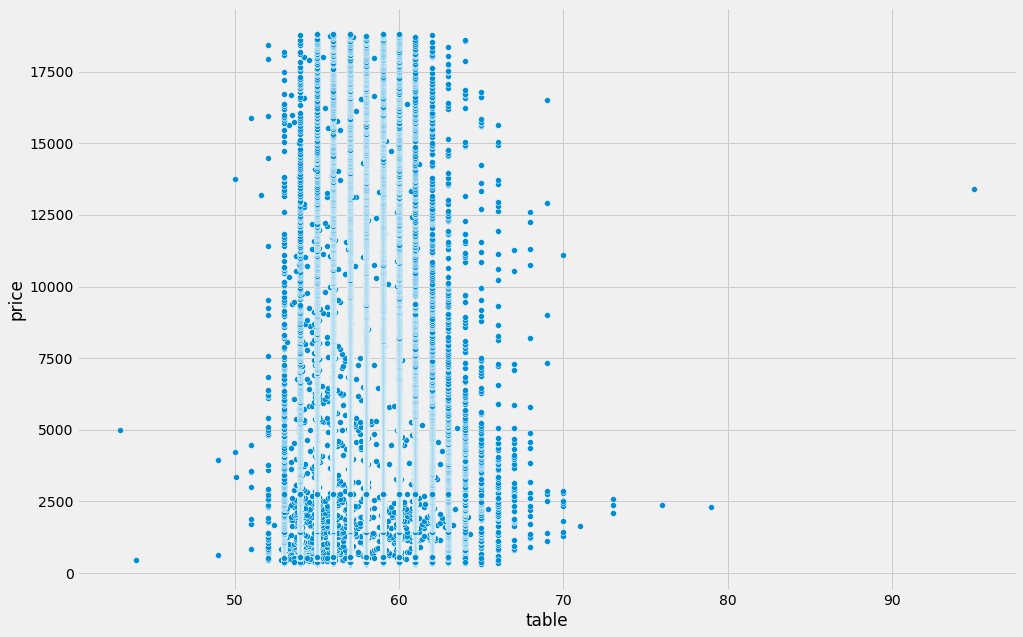

In [29]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='table', y='price', data=data)

<AxesSubplot:xlabel='x', ylabel='price'>

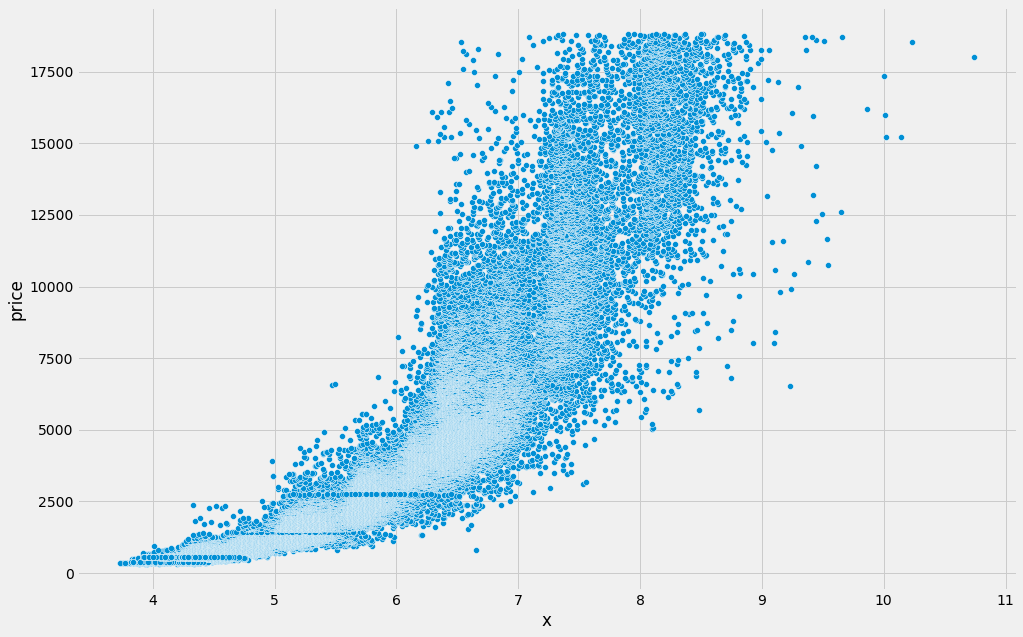

In [30]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='x', y='price', data=data)

<AxesSubplot:xlabel='y', ylabel='price'>

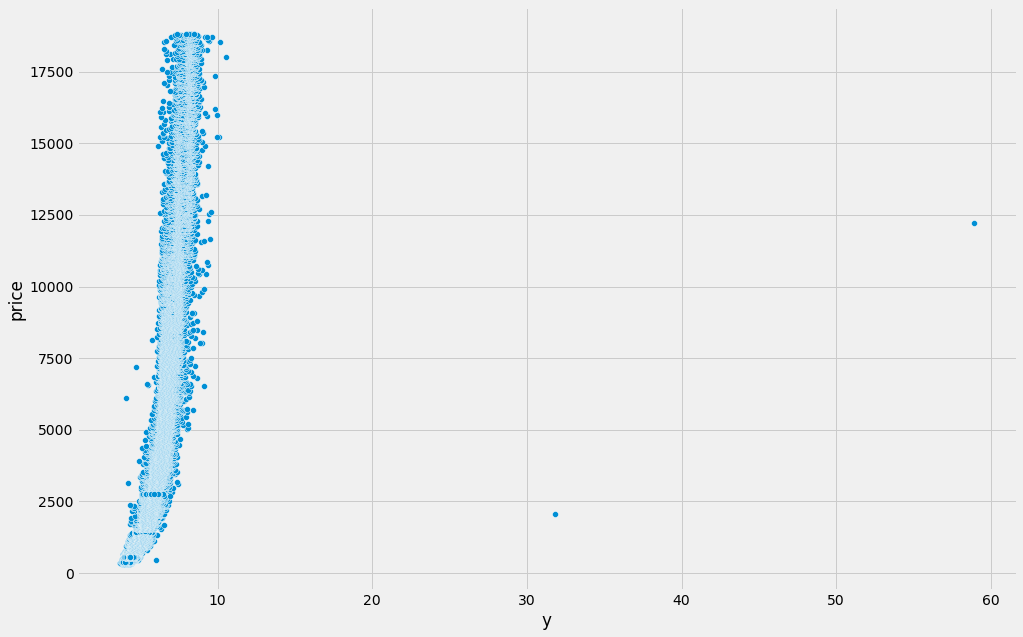

In [31]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='y', y='price', data=data)

<AxesSubplot:xlabel='z', ylabel='price'>

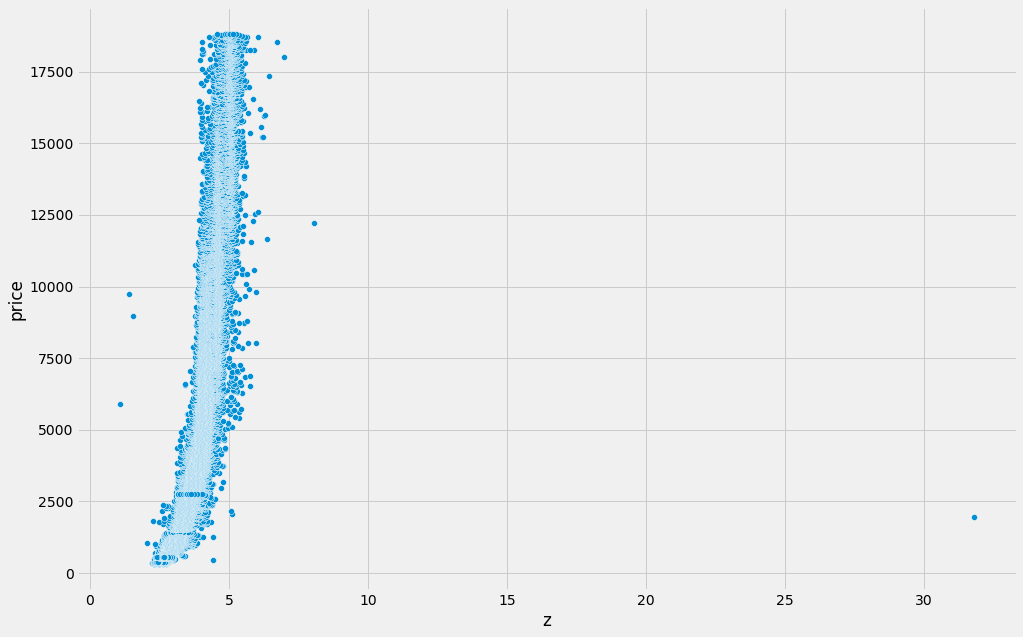

In [32]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='z', y='price', data=data)

# Handeling Categorical Columns

In [5]:
# One hot Encoding for Categorical Columns 
data= pd.get_dummies(data,columns=categorical_cols)

In [6]:
# Looking at the DataFrame after Encoding
data.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [9]:
# Separating the Dependent and Independent Features
X = data.drop('price',axis=1)
y = data['price']

In [10]:
# Splitting the Data.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=43)

In [13]:
# Scaling the Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# KNN without using Scikit Learn

In [22]:
class KNN:
    def __init__(self,k):
        self.k=k
    def fit(self,X,y):
        self.X=np.asarray(X)
        self.y=np.asarray(y)
    def predict(self,X):
        X=np.asarray(X)
        result=[]
        for x in X:
            dis=np.sqrt(np.sum((x-self.X)**2,axis=1))
            index=dis.argsort()
            index=index[:self.k]
            result.append(np.mean(self.y[index]))
        return np.array(result)

In [23]:
knn=KNN(k=3)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
display(y_pred)

array([ 3483.66666667,  1257.        ,  1449.66666667, ...,
         868.        , 14328.66666667,  2066.33333333])

In [28]:
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))
print('R2 Score: ', metrics.r2_score(y_test, y_pred))

Mean Squared Error:  712358.1062662217
R2 Score:  0.9555101078317962


# KNN with Scikit - Learn

In [29]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
sk_preds = knn.predict(X_test)
print('Mean Squared Error: ',mean_squared_error(y_test,sk_preds))
print('R2 Score: ',r2_score(y_test,sk_preds))

Mean Squared Error:  734177.1521245828
R2 Score:  0.9541474125961941
